In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars-database/autos.csv
/kaggle/input/used-cars-database/cnt_km_year_powerPS_minPrice_maxPrice_avgPrice_sdPrice.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
cars_data = pd.read_csv(r'/kaggle/input/used-cars-database/autos.csv', encoding='ISO-8859-1')

In [5]:
cars_data.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
cars_data.shape

(371528, 20)

In [7]:
## Create copy of dataframe for data manipulation
cars_copy=cars_data.copy()

In [8]:
cars_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [9]:
cars_copy.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [10]:
## To display maximum set of columns
pd.set_option('display.max_columns', 500)
cars_copy.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


# Data Cleaning

In [11]:
## Dropping unnecessary columns from dataframe
col=['name','dateCrawled','dateCreated','postalCode','lastSeen','nrOfPictures']
cars_copy = cars_copy.drop(columns=col, axis=1)
cars_copy.shape

(371528, 14)

In [12]:
## Remove duplicate records
cars_copy.drop_duplicates(keep='first', inplace=True)
cars_copy.shape

(353306, 14)

In [13]:
## Find total null values in each column
cars_copy.isnull().sum()

seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            36439
yearOfRegistration         0
gearbox                18562
powerPS                    0
model                  19708
kilometer                  0
monthOfRegistration        0
fuelType               32222
brand                      0
notRepairedDamage      68964
dtype: int64

### Manipulation of Numeric variable

In [119]:
## Variable year of registration
yearwise_count=cars_copy['yearOfRegistration'].value_counts().sort_index()
sum(cars_copy['yearOfRegistration'] >2020)
sum(cars_copy['yearOfRegistration'] >1950)
sns.regplot(x='yearOfRegistration', y='price', scatter=True, fit_reg=False, data=cars_copy)
## Working range 1950 and 2020

KeyError: 'yearOfRegistration'

In [15]:
## No. of cars having year of registration is greater than 2020 thats why above graph is unclear due to higher value
yearwise_count=cars_copy['yearOfRegistration'].value_counts().sort_index()
sum(cars_copy['yearOfRegistration'] >2020)

111

In [16]:
## No. of cars having year of registration is lesser than 1950
yearwise_count=cars_copy['yearOfRegistration'].value_counts().sort_index()
sum(cars_copy['yearOfRegistration'] <1950)

274

In [17]:
## Now work on variable price for cleaning
price_count=cars_copy['price'].value_counts().sort_index()
price_count

0             9811
1             1127
2               12
3                8
4                1
              ... 
32545461         1
74185296         1
99000000         1
99999999        15
2147483647       1
Name: price, Length: 5597, dtype: int64

count    3.533060e+05
mean     1.790111e+04
std      3.679314e+06
min      0.000000e+00
25%      1.111000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

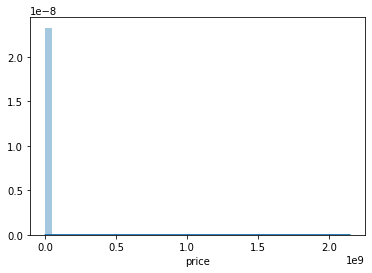

In [18]:
## Now working range is 100 to 150000
sns.distplot(cars_copy['price'])
cars_copy['price'].describe()

12269

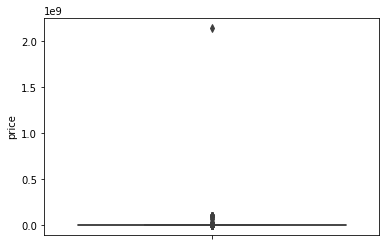

In [19]:
## check how many cars price is out of our range i.e 100 to 150000
sns.boxplot(y=cars_copy['price'])
sum(cars_copy['price'] >150000)
sum(cars_copy['price'] <100)
## The box plot is unclear coz of extreme values in data which is highly extreme

In [20]:
## Next variable is powerPS
power_count =cars_copy['powerPS'].value_counts().sort_index()
power_count

0        38637
1           32
2           10
3            9
4           27
         ...  
17932        1
19208        1
19211        1
19312        1
20000        1
Name: powerPS, Length: 794, dtype: int64

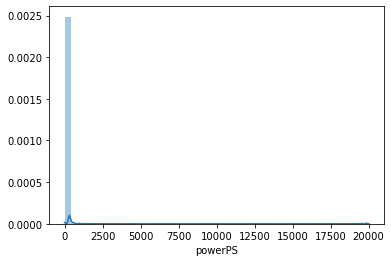

In [21]:
sns.distplot(cars_copy['powerPS'])

In [22]:
## Above distplot is unclear and irregular due to unconsistent value in column
cars_copy['powerPS'].describe()

count    353306.000000
mean        115.758524
std         196.372902
min           0.000000
25%          70.000000
50%         105.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

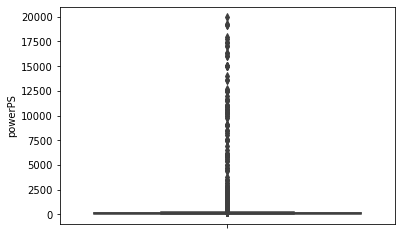

In [23]:
## Boxplot is unclear and irregular due to unconsistent value in column
sns.boxplot(y=cars_copy['powerPS'])

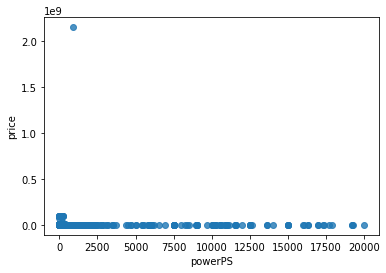

In [24]:
sns.regplot(x='powerPS', y='price', scatter=True, fit_reg=False, data=cars_copy)

In [25]:
## Now set range of powerPS in column i.e 10 to 500 and check how many values are out of range
sum(cars_copy['powerPS'] >500)
sum(cars_copy['powerPS'] <100)

147580

## Set working range of data

In [26]:
## Set range of coluun values of dataframe for further processing 
cars_copy = cars_copy[
    (cars_copy.yearOfRegistration <=2020)
   & (cars_copy.yearOfRegistration >=1950)
   & (cars_copy.price >=100)
    & (cars_copy.price <= 150000)
    & (cars_copy.powerPS >= 10)
    & (cars_copy.powerPS <=500)
     ]
cars_copy.shape ##Sure we loose some data which is out of range

(305771, 14)

In [27]:
## Further simplication to reduce number of variables
## Combining year of registration and month of registration 

cars_copy['monthOfRegistration']/=12

In [28]:
## Creating new variable Age by adding yearOfRegistration and monthOfRegistration
cars_copy['Age'] = (2020-cars_copy['yearOfRegistration']) + cars_copy['monthOfRegistration']
cars_copy['Age'] = round(cars_copy['Age'],2)
cars_copy['Age'].describe()

count    305771.000000
mean         16.888400
std           7.160184
min           1.000000
25%          12.250000
50%          16.830000
75%          21.250000
max          70.580000
Name: Age, dtype: float64

In [29]:
## Now, drop column yearofregistration and monthofregistration from df
cars_copy.drop(columns=['yearOfRegistration', 'monthOfRegistration'], axis =1, inplace=True)
cars_copy.shape

(305771, 13)

## Visualizing Parameters

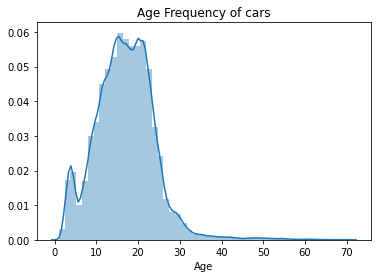

In [30]:
sns.distplot(cars_copy['Age'])
plt.title("Age Frequency of cars")
plt.show()

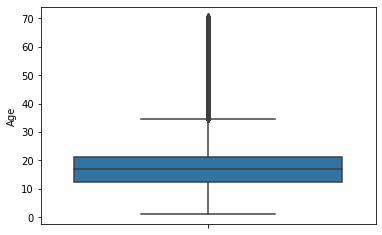

In [31]:
## boxpllot of Age of an car it shows min, max and outliners or extreme age value of an car
sns.boxplot(y =cars_copy['Age'])

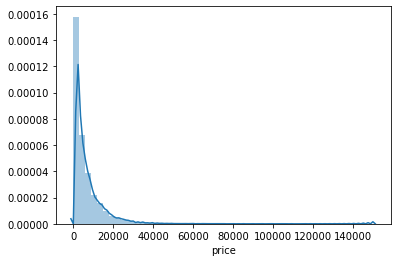

<function matplotlib.pyplot.show(*args, **kw)>

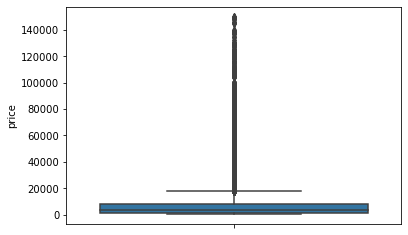

In [32]:
## Distplolt of Price of car
sns.distplot(cars_copy['price'])
plt.show()
sns.boxplot(y= cars_copy['price'])
plt.show

#### The plot of price of cars is now better than previous but still there are extreme values

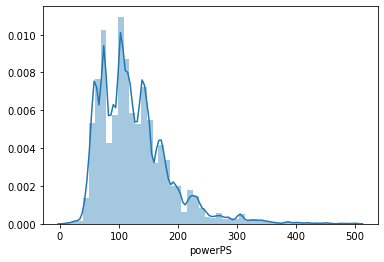

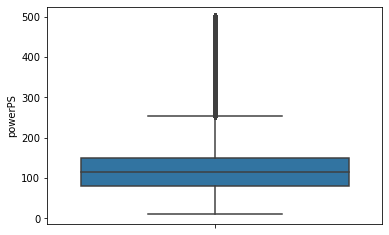

In [33]:
## PowerPS plot representation
sns.distplot(cars_copy['powerPS'])
plt.show()
sns.boxplot(y =cars_copy['powerPS'])

##### The powerPS graph representation is more clear to understand and visualize than previously.

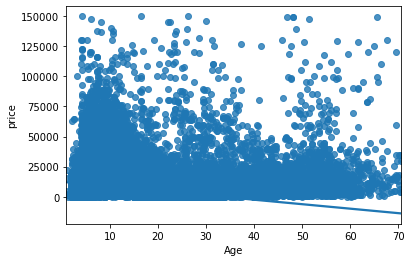

In [34]:
## Visualizing parameters after narrowing working range 
sns.regplot(x='Age', y='price', scatter =True, data=cars_copy)

##### The plot between car age and price shows negative correlation i.e price of car is reducing as age increasing but there are few cars also whose price does not reduce because they were vintage cars.

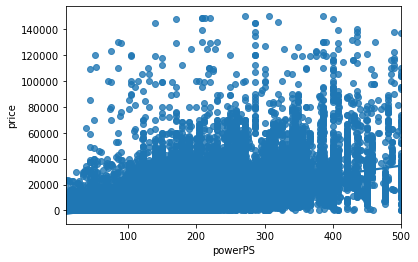

In [35]:
sns.regplot(x='powerPS', y='price', scatter=True, data=cars_copy, fit_reg=True)

##### The higher the powerPs the price of cars also getting higher

In [36]:
## Check individual frequency count of an category under categorical variables 
## Variable seller'
cars_copy['seller'].value_counts()

privat        305769
gewerblich         2
Name: seller, dtype: int64

In [37]:
pd.crosstab(cars_copy['seller'], columns ='count', normalize=True) ## FInd marginal probability

col_0,count
seller,
gewerblich,0.000007
privat,0.999993


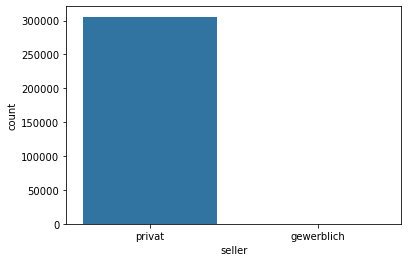

In [38]:
sns.countplot(x='seller', data=cars_copy)

In [39]:
## Variable offerType
cars_copy['offerType'].value_counts()

Angebot    305769
Gesuch          2
Name: offerType, dtype: int64

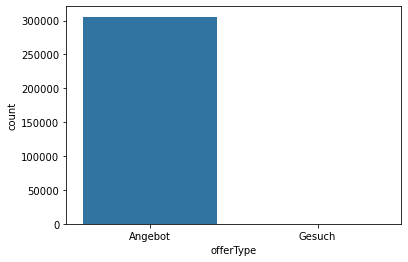

In [40]:
sns.countplot(x='offerType', data=cars_copy)

#### Above shows both vategorical variable are insignificant for our analysis. 

In [41]:
## VAriable abtest
cars_copy['abtest'].value_counts()

test       158189
control    147582
Name: abtest, dtype: int64

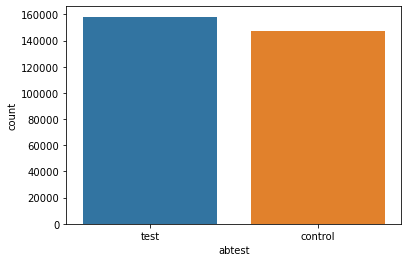

In [42]:
sns.countplot(x='abtest', data=cars_copy)

In [43]:
pd.crosstab(cars_copy['abtest'], columns='count', normalize=True)

col_0,count
abtest,
control,0.482655
test,0.517345


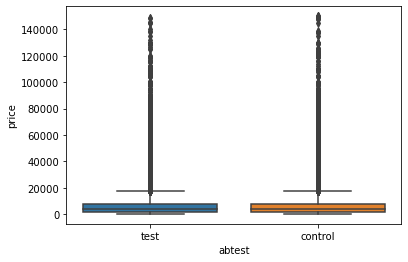

In [44]:
## Equally distributed
sns.boxplot(x= 'abtest', y='price', data=cars_copy)

##### Above plot shows equally distributed graph between price and abtest that shows it is in-significant variable. Equally distributed category did not contribute so much to our analysis so they are mostly in-significant.

In [45]:
## Variable Vehicletype
cars_copy['vehicleType'].value_counts()

limousine     82443
kleinwagen    66226
kombi         58144
bus           26310
cabrio        20298
coupe         16401
suv           12777
andere         2427
Name: vehicleType, dtype: int64

In [46]:
pd.crosstab(cars_copy['vehicleType'], columns ='count', normalize=True)

col_0,count
vehicleType,
andere,0.008515
bus,0.092307
cabrio,0.071215
coupe,0.057542
kleinwagen,0.232351
kombi,0.203995
limousine,0.289247
suv,0.044827


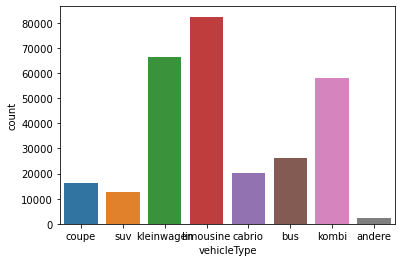

In [47]:
## Which type of car are in higher number
sns.countplot(x='vehicleType', data=cars_copy)

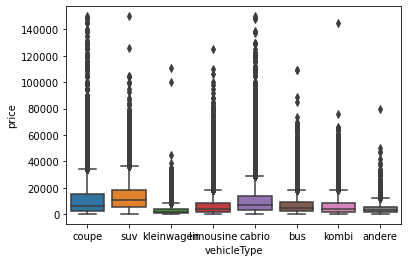

In [48]:
## Show box plot of an car of different type
sns.boxplot(x= 'vehicleType',y='price', data=cars_copy)

In [49]:
## Vehicle gearbox
cars_copy['gearbox'].value_counts()

manuell      233207
automatik     66665
Name: gearbox, dtype: int64

In [50]:
pd.crosstab(cars_copy['gearbox'], columns='count', normalize=True)

col_0,count
gearbox,
automatik,0.222312
manuell,0.777688


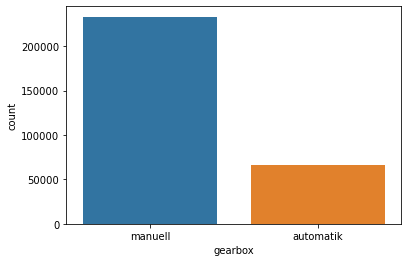

In [51]:
sns.countplot(x='gearbox', data=cars_copy)

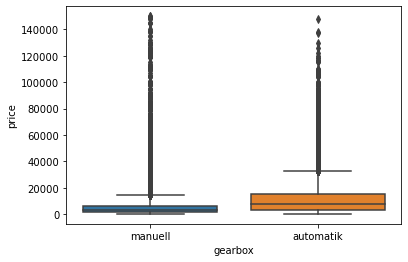

In [52]:
## Find impact of different gearbox in price of a car
sns.boxplot(x='gearbox', y='price', data=cars_copy)

In [53]:
## Variable model
cars_copy['model'].value_counts() >10000

golf                True
andere              True
3er                 True
polo                True
corsa              False
                   ...  
samara             False
rangerover         False
kalina             False
serie_3            False
discovery_sport    False
Name: model, Length: 250, dtype: bool

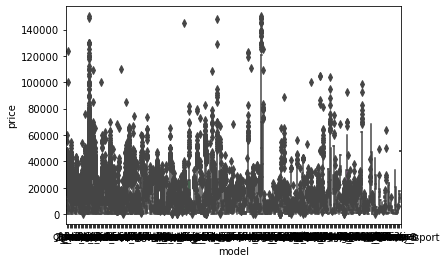

In [54]:
## Totally irrelevant to analyse because of large no. of category of car models
sns.boxplot(x='model', y='price', data=cars_copy)

In [55]:
## Variable kilometer
cars_copy['kilometer'].value_counts()

150000    195525
125000     32675
100000     13391
90000      10883
80000       9699
70000       8710
60000       7609
50000       6759
40000       5624
30000       5214
20000       4741
5000        3390
10000       1551
Name: kilometer, dtype: int64

In [56]:
pd.crosstab(cars_copy['kilometer'], columns='count', normalize=True)

col_0,count
kilometer,
5000,0.011087
10000,0.005072
20000,0.015505
30000,0.017052
40000,0.018393
50000,0.022105
60000,0.024885
70000,0.028485
80000,0.031720


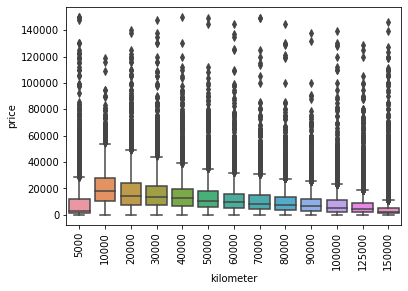

In [57]:
sns.boxplot(x='kilometer', y='price', data=cars_copy)
plt.xticks(rotation='vertical')
plt.show()

##### Increase in kilometer of car decrease in price but there is some exception i.e kilometer variable impacts price of cars. The car travelled more so the price value also reduces.

In [58]:
## Variable Fueltype
cars_copy['fuelType'].value_counts()

benzin     188398
diesel      92485
lpg          4631
cng           481
hybrid        242
andere         87
elektro        70
Name: fuelType, dtype: int64

In [59]:
pd.crosstab(cars_copy['fuelType'], columns='count', normalize=True)

col_0,count
fuelType,
andere,0.000304
benzin,0.657828
cng,0.001680
diesel,0.322929
elektro,0.000244
hybrid,0.000845
lpg,0.016170


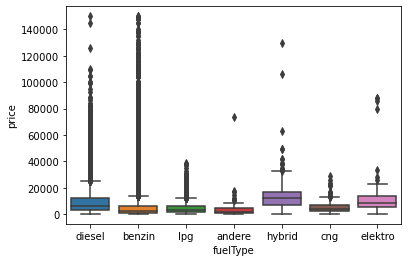

In [60]:
sns.boxplot(x='fuelType', y='price', data=cars_copy)

In [61]:
## VAriable Brand
cars_copy.brand.value_counts()

volkswagen        65416
bmw               34244
opel              32138
mercedes_benz     29509
audi              28085
ford              20642
renault           13895
peugeot            9191
fiat               7607
seat               5944
skoda              4926
mazda              4755
smart              4435
citroen            4264
nissan             4072
toyota             4052
hyundai            3113
mini               3066
volvo              2821
mitsubishi         2519
honda              2393
kia                2138
sonstige_autos     2120
alfa_romeo         1985
suzuki             1937
porsche            1851
chevrolet          1507
chrysler           1159
dacia               785
jeep                689
land_rover          663
subaru              657
daihatsu            604
jaguar              513
saab                462
daewoo              407
lancia              395
rover               372
trabant             286
lada                154
Name: brand, dtype: int64

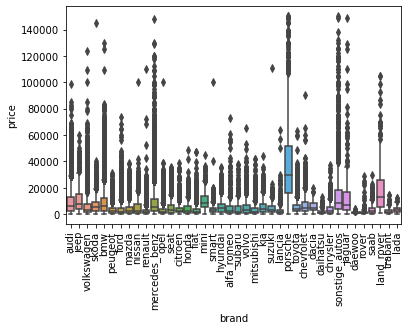

In [62]:
sns.boxplot(x='brand', y= 'price', data=cars_copy)
plt.xticks(rotation='vertical')
plt.show()

In [63]:
## Variable notRepairDamage
## yes - car is damaged but not rectified
## no - car is damaged but has been rectified
cars_copy.notRepairedDamage.value_counts()

nein    231513
ja       28623
Name: notRepairedDamage, dtype: int64

In [64]:
pd.crosstab(cars_copy['notRepairedDamage'], columns='count', normalize=True)

col_0,count
notRepairedDamage,
ja,0.110031
nein,0.889969


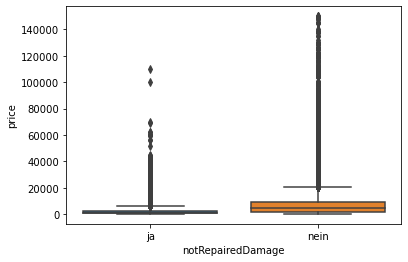

In [65]:
sns.boxplot(x= 'notRepairedDamage', y='price', data=cars_copy)

In [66]:
## Recovering insignificant variables
col_insig =['abtest','seller','offerType']
cars_copy =cars_copy.drop(columns=col_insig, axis=1)
cars_copy2 = cars_copy.copy()

In [67]:
## Correlation between numeric data type variable only
cars_select1 =cars_copy.select_dtypes(exclude='object')

In [68]:
correlation =cars_select1.corr()
round(correlation,3)

,price,powerPS,kilometer,Age
price,1.000,0.572,-0.442,-0.336
powerPS,0.572,1.000,-0.016,-0.154
kilometer,-0.442,-0.016,1.000,0.295
Age,-0.336,-0.154,0.295,1.000


In [69]:
## .loc function based on price and return only 1st column and taking absolute value and sorting in ascending order
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS      0.572338
kilometer    0.442052
Age          0.335522
Name: price, dtype: float64

# Model Development :- Prdiction

### Now, build a Linear Regression and Random Forest Model on two set of data.

Data obtained by omitting rows with any missing values.

Data obtained by inputing the missing values.

### OMITTING MISSING VALUES

In [70]:
cars_omit = cars_copy.dropna(axis=0)

In [71]:
## After drop missing rows we check shape of data
cars_omit.shape

(233649, 10)

In [72]:
## Converting categorical variables to dummy variables
cars_omit=pd.get_dummies(cars_omit, drop_first=True)

In [73]:
## After adding dummy values the columns will be increase coz each category is now shown in either 0 or 1 and there are large number of categories in categorical varaible
cars_omit.shape

(233649, 306)

### Importing necessary libraries for model development

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### MODEL BUILDING WITH OMITTED DATA

In [75]:
## Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2df0ae7a10>,
      dtype=object)

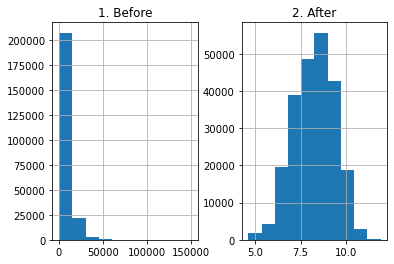

In [76]:
## Plotting the variable price and log of price
prices =pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()
plt.show()

In [77]:
## Transform price as a logarithmic value
y1 =np.log(y1)

In [78]:
## splitting data into test and train to fit model & predict
## Train set contains 70% data because test_size =0.3 and random state is a predefined algorithm its called pseudo random  number generator 
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(163554, 305) (70095, 305) (163554,) (70095,)


### BASELINE MODEL FOR OMITTED DATA

WE are making a base model by using test data mean value. This is to set a benchmark and to compare with our regression model.

In [79]:
## Finding the mean for test data value
base_pred =np.mean(y_test)
print(base_pred)

8.241482099734222


In [80]:
## Representing some value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

In [81]:
## FInding the RMSE(Root Mean Squared Error)
## RMSE computes the difference between the test value and the predicted value and squared them and divides them by number of samples.

base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error)

1.1394028512070056


## LINEAR REGRESSION WITH OMITTED DATA

In [82]:
## Setting intercept as true
lgr = LinearRegression(fit_intercept =True)

In [83]:
## MODEL
model_lin1 = lgr.fit(x_train, y_train)

In [84]:
## Predicting model on test set
cars_predictions_lin1 = lgr.predict(x_test)

In [85]:
## Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5492285657774858


In [86]:
## R squared value
r2_lin_test1 = model_lin1.score(x_test, y_test)
r2_lin_train1 = model_lin1.score(x_train, y_train)
print(r2_lin_test1, r2_lin_train1)

0.7676452096924824 0.7723543128838899


count    70095.000000
mean        -0.004841
std          0.549211
min         -5.771714
25%         -0.265338
50%          0.033547
75%          0.290206
max          5.794118
Name: price, dtype: float64

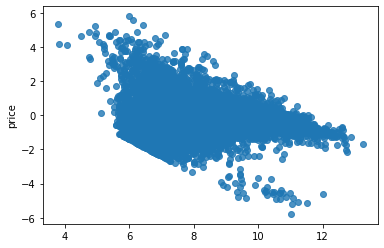

In [87]:
## Regression diagnostics :- Resident plot analysis
## It is differnce test data and your prediction. It is just difference between actual & predicted value.
residuals1 = y_test - cars_predictions_lin1
sns.regplot(x = cars_predictions_lin1, y=residuals1, scatter=True, fit_reg=False, data=cars_copy)
residuals1.describe()

#### Above analysis shows our predicted and actual value are very closer.

### RANDOM FOREST with Omitted Data

In [88]:
## MODEL PARAMETERS
rf = RandomForestRegressor(n_estimators = 100, max_features='auto', max_depth=100, min_samples_split=10, min_samples_leaf=4, random_state=1)

In [89]:
## MODEL
model_rf1 =rf.fit(x_train, y_train)

In [90]:
## Predicting model on test set
cars_predictions_rf1 = rf.predict(x_test)

In [92]:
## Computing MSE and RSME
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.3945507610508214


In [94]:
## R Squared value
r2_rf_test1 = model_rf1.score(x_test, y_test)
r2_rf_train1 = model_rf1.score(x_train, y_train)
print(r2_rf_test1, r2_rf_train1)

0.880091169536474 0.9273829250795579


## MODEL BULDING WITH INPUTED DATA

In [98]:
## Fillna will fill missing value with median in float data type variable and otherwise it will fill the cell with most frequent value

cars_inputed = cars_copy.apply(lambda x:x.fillna(x.median()) if x.dtype=='float' else x.fillna(x.value_counts().index[0]))
cars_inputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [99]:
## Converting categorical variables to dummy variables

cars_inputed = pd.get_dummies(cars_inputed, drop_first = True)

In [100]:
## MODEL BUILDING

## Separating input and output feature
x2 = cars_inputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_inputed['price']

In [101]:
## Ploting the variable price
prices2 = pd.DataFrame({"1. Before":y2, "2. After": np.log(y2)})

In [102]:
## Transforming price as a logarithmic value
y2 = np.log(y2)

In [103]:
## splitting data into test and train to fit model & predict
## Train set contains 70% data because test_size =0.3 and random state is a predefined algorithm its called pseudo random  number generator 

x_train1, x_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(214039, 306) (91732, 306) (214039,) (91732,)


### BASELINE MODEL FOR INPUTTED DATA

In [104]:
## Find the mean for test data
base_pred2 = np.mean(y_test1)
print(base_pred2)

8.08888844699951


In [105]:
## Representing some value till length of test data
base_pred2 = np.repeat(base_pred2, len(y_test1))

In [106]:
## FInding the RMSE(Root Mean Squared Error)
## RMSE computes the difference between the test value and the predicted value and squared them and divides them by number of samples.

base_root_mean_square_error_inputed = np.sqrt(mean_squared_error(y_test1, base_pred2))
print(base_root_mean_square_error_inputed)

1.1843191373282287


### LINEAR REGRESSION WITH INPUTTED DATA

In [107]:
## Setting intercept as true
lgr2 = LinearRegression(fit_intercept =True)

In [108]:
## MODEL
model_lin2 = lgr2.fit(x_train1, y_train1)

In [109]:
## Predicting model on test set
cars_predictions_lin2 = lgr2.predict(x_test1)

In [110]:
## Computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

0.6432882510454058


In [111]:
## R squared value
r2_lin_test2 = model_lin2.score(x_test1, y_test1)
r2_lin_train2 = model_lin2.score(x_train1, y_train1)
print(r2_lin_test2, r2_lin_train2)

0.7049648603305396 0.7031299443910702


### RANDOM FOREST WITH INPUTED DATA

In [112]:
## MODEL PARAMETERS
rf2 = RandomForestRegressor(n_estimators = 100, max_features='auto', max_depth=100, min_samples_split=10, min_samples_leaf=4, random_state=1)

In [113]:
## MODEL
model_rf2 =rf2.fit(x_train1, y_train1)

In [114]:
## Predicting model on test set
cars_predictions_rf2 = rf2.predict(x_test1)

In [115]:
## Computing MSE and RSME
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.4469332354098783


In [117]:
## R Squared value
r2_rf_test2 = model_rf2.score(x_test1, y_test1)
r2_rf_train2 = model_rf2.score(x_train1, y_train1)
print(r2_rf_test2, r2_rf_train2)

0.8575875989335454 0.9088707394700337
